# 第二周内容

数据处理目标：
1. 清洗数据，将不合理异常值和空缺值剔除
2. 按商店分组，找到销售量最好的店面（分析商店选址是否合适）
3. 按商店分组，找到客流量最大的店面
4. 按商品分组，绘制销量图，找到各个店销售额贡献最大的商品（没有所有商品在原价时的销售额，无法分析无促销是的销售额）
5. 由于每家商店具有自己的特殊性，因此将每家商店的数据抽出单独处理。由于分析方法相同，此处只处理销量和客流量最大的A001店。
6. 找到每家店销量最高的商品，进而分析出每家店所面对的顾客的购买习惯。
7. 找到每家店成交单数最多的价格区间，分析出每家店面对的顾客的购买力。
8. 分析每家店每周的顾客流量情况，了解每周中哪一天是客流量的高峰期，有助于合理分配人力资源。

## 导入必要的图形处理包

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## 导入数据和数据预处理（Basket-2018-06-01-2018-07-05.csv）

In [2]:
import pandas as pd
data1 = pd.read_csv('E:\\非功能性文件\\study\\postgraduate\\研二上\\python\\作业\\20201006作业\\数据集\\Basket-2018-06-01-2018-07-05.csv')
data1 = data1.iloc[:,:]
data1.head(5)

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.0
1,2018/6/1,D007,3,250200,32.7
2,2018/6/1,D007,1,161068,16.8
3,2018/6/1,D007,8,5325,30.4
4,2018/6/1,D007,8,5361,191.3


In [3]:
data1.isnull().any()#查看是否有缺失值

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool

In [4]:
data1=data1[data1['BASK_SPEND']>0]  #剔除data1数据集中bask_spend列小于0的行
data1.head(5)

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.0
1,2018/6/1,D007,3,250200,32.7
2,2018/6/1,D007,1,161068,16.8
3,2018/6/1,D007,8,5325,30.4
4,2018/6/1,D007,8,5361,191.3


## 导入数据和数据预处理（item-2018-06-01-2018-07-05.csv）

In [5]:
import pandas as pd
data2 = pd.read_csv('E:\\非功能性文件\\study\\postgraduate\\研二上\\python\\作业\\20201006作业\\数据集\\item-2018-06-01-2018-07-05.csv')
data2 = data2.iloc[:,:]
data2.head(5)

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018/6/1,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018/6/1,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018/6/1,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018/6/1,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018/6/1,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


In [6]:
data2.isnull().any()#查看是否有缺失值

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool

In [7]:
data2=data2[data2['ITEM_SPEND']>0]  #剔除data2数据集中ITEM_SPEND列小于0的行
data2=data2[data2['ITEM_QUANTITY']>0]  #剔除data2数据集中ITEM_QUANTITY列小于0的行
data2=data2[data2['NORMAL_PRICE']>0]  #剔除data2数据集中NORMAL_PRICE列小于0的行
data2.head(5)

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018/6/1,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018/6/1,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018/6/1,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018/6/1,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018/6/1,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


## 根据表（Basket-2018-06-01-2018-07-05.csv）找到商店的销售额排序

In [13]:
SalesRanking = data1.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)
SalesRanking.head()

,STORE_CODE,BASK_SPEND
0,A001,3.478348e+06
15,D002,3.177385e+06
20,D007,1.382203e+06
4,A008,1.324641e+06
8,A013,1.126551e+06


从上述排序中可以得到每家商店的销售额不同，存在差异较大，可收集更多信息进一步分析销售额不同的原因，根据分析结果适当改换商店选址策略。
为了更加直观看出商店之间的销售额不同，绘制柱形图展现各商店的销售额情况。

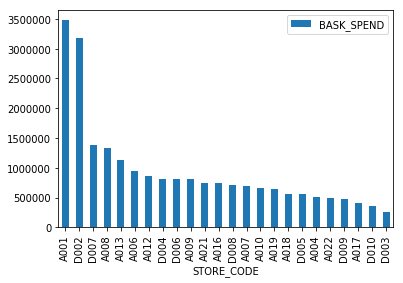

In [9]:
SalesRanking.set_index('STORE_CODE',inplace=True)
SalesRanking.plot(kind='bar')

## 分析商店的客流量

In [10]:
CustomerFlow = data1.loc[:,'STORE_CODE'].value_counts()
CustomerFlow

A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
A021    20555
A010    19543
D006    18572
A016    18279
A007    17954
A019    16985
D009    15827
A018    15731
D005    15261
A022    15260
A004    13429
A017    12459
D010    11070
D003     7771
Name: STORE_CODE, dtype: int64

从上述排序中可以看出基本和销售额排序相同，说明客流量是影响销售额的一个重要原因。商店的选址可以从客流量的角度分析。

## 分析商品销量（没有所有商品在原价时的销售额，无法分析无促销时的销售额） 

In [12]:
ProdRanking = data2.groupby('PROD_CODE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)
ProdRanking.head()

,PROD_CODE,ITEM_QUANTITY
7956,149413,30741.0
15641,220834,20119.0
1435,7133,15184.0
3713,61623,14651.0
5055,86772,14135.0


## 按照每家商店逐个分析 

以商店为单位，将数据集拆分,共24家商店，每家店同样的分析方法，此处以销量排名第一的A001做例

In [25]:
import numpy as np
df11 = data1[data1['STORE_CODE'].isin(["A001"])] # 选取A001的数据
df11.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
24,2018/6/2,A001,6,229732,7.50
25,2018/6/2,A001,3,25793,52.95
26,2018/6/2,A001,6,229639,46.80
27,2018/6/2,A001,6,229708,30.38
28,2018/6/2,A001,6,229785,21.30


In [27]:
df12 = data2[data2['STORE_CODE'].isin(["A001"])] 
df12.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
808,2018/6/2,A001,6,229611,15930,1.0,1.8,1.800000,n,0.0
809,2018/6/2,A001,6,229611,15930,1.0,1.8,1.800000,n,0.0
810,2018/6/2,A001,2,125591,147631,12.0,55.0,4.583333,n,0.0
811,2018/6/2,A001,6,229732,157209,1.0,7.5,7.500000,n,0.0
812,2018/6/2,A001,6,229733,148937,1.0,2.5,2.500000,n,0.0


分析商店的商品销售量，得到在该商店中消费的顾客的购买需求，方便商店制定后续进货策略

In [30]:
SProdRanking = df12.groupby('PROD_CODE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)
SProdRanking.head()

,PROD_CODE,ITEM_QUANTITY
3728,149413,10805.0
6211,220834,7116.0
192,1157,3494.0
1124,10270,2800.0
917,7137,2388.0


根据商品编号对应商品名称，分析销量靠前的商品的属性，从而得到该商店顾客的购买特征。

通过查看每单消费的基本统计信息，得到这家商店顾客的购买行为发生的特征。

In [32]:
df11["BASK_SPEND"].describe()

count    66507.000000
mean        52.300478
std        441.570974
min          0.010000
25%         10.800000
50%         23.800000
75%         52.560000
max      79920.000000
Name: BASK_SPEND, dtype: float64

分析每家店每周的顾客流量情况，了解每周中哪一天是客流量的高峰期，有助于合理分配人力资源。

将时间重新处理

In [33]:
df11['SHOP_WEEKTIME']=''
df11['SHOP_WEEKTIME']=df11['SHOP_DATETIME']
df11['SHOP_WEEKTIME'] = pd.to_datetime(df11['SHOP_WEEKTIME'])
df11['SHOP_WEEKTIME'] = df11['SHOP_WEEKTIME'].apply(lambda x: x.weekday() + 1)
df11.head()

C:\Users\taoxi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\taoxi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\taoxi\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND,SHOP_WEEKTIME
24,2018/6/2,A001,6,229732,7.50,6
25,2018/6/2,A001,3,25793,52.95,6
26,2018/6/2,A001,6,229639,46.80,6
27,2018/6/2,A001,6,229708,30.38,6
28,2018/6/2,A001,6,229785,21.30,6


In [34]:
bask = df11.groupby('SHOP_WEEKTIME')['BASK_CODE'].nunique()
bask = bask.to_frame().reset_index()
bask.columns = ['WEEK', 'BASK_NUM']
bask

,WEEK,BASK_NUM
0,1,9039
1,2,8202
2,3,10056
3,4,8229
4,5,9045
5,6,10526
6,7,11161


绘制每天销售量占比情况

Text(0.5, 1.0, '星期一至星期日的消费次数')

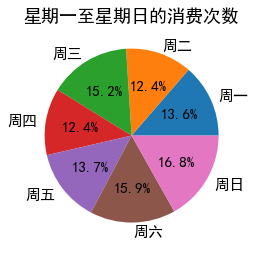

In [47]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(6, 4))
plt.rcParams["font.size"] = "15"
weeks=['周一','周二','周三','周四','周五','周六','周日']
plt.pie(bask['BASK_NUM'],labels=weeks,autopct="%3.1f%%")
plt.title('星期一至星期日的消费次数')

折线图比饼状图更加直观看出每天的销售变化情况。

Text(0.5, 1.0, '星期一至星期日的消费次数')

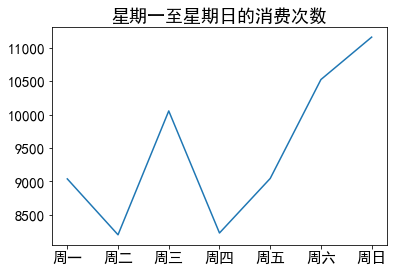

In [46]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(6, 4))
plt.rcParams["font.size"] = "15"
weeks=['周一','周二','周三','周四','周五','周六','周日']
plt.plot(weeks,bask["BASK_NUM"])
plt.title('星期一至星期日的消费次数')

通过上图可得知在A001中每周每天的销售额情况，从而有效安排人员。